# Skills: Programming with Advanced Computer Languages
## Cryptocurrency Portfolio Construction and Performance Analysis

Project of:
Rakeesh Karunakaran & Venjamin Koscica


### Importing our Portfolio_Library

In [1]:
import import_ipynb
from Crypto_portfolio_library import Portfolio_Weights,Prices_Return_Df,Metrics
import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

importing Jupyter notebook from Crypto_portfolio_library.ipynb


### Input Required Crypto Tickers as per Yahoo Finance Symbol (suffixed by -USD)
Know more - (https://finance.yahoo.com/cryptocurrencies/)

In [2]:
ticker=["BTC-USD","ETH-USD","LINK-USD","ADA-USD","DOT1-USD","BNB-USD","DOGE-USD","XRP-USD","BCH-USD","LUNA1-USD"] #Input in array format

### Input the Invested Capital,From date (Date from which price data has to be fetched), Risk-Free Rate.

In [3]:
invested_capital=100 # Portfolio Capital
from_date="01/01/2020" # m/d/year
riskFreeRate=0.01  # Percent in Decimal

### Fetching Price and Returns Dataframe

In [4]:
price_df,return_df=Prices_Return_Df(ticker,from_date,riskFreeRate) #This function outputs two dataframe their actual close price df and the returns df.

Successfully Fetched | BTC-USD
Successfully Fetched | ETH-USD
Successfully Fetched | LINK-USD
Successfully Fetched | ADA-USD
Insufficient data DOT1-USD
Successfully Fetched | BNB-USD
Successfully Fetched | DOGE-USD
Successfully Fetched | XRP-USD
Successfully Fetched | BCH-USD
Successfully Fetched | LUNA1-USD
513 | Total length of data Used for Analysis


### Creating two objects from Portfolio_Weights Class and Metrics Class(To access specific attributes of them)

In [5]:
portfolio=Portfolio_Weights(return_df,invested_capital) #Creating Portfolio_Weights object by passing returns dataframe and invested capital
metrics=Metrics(return_df,invested_capital) #Creating Metrics object by passing returns dataframe and invested capital

### Input Confidence score , No. of days in month , No. of days in year for calculating VaR monthly

In [6]:
confidence=0.95 #confidence score for VaR(0-1)
monthly_days=20 #no. of working days in month

## Equally weighted Portfolio

### Obtaining weights in array format

In [7]:
eq_weights_df=portfolio.Equally_Weighted()      #obtaining weights as pandas series
eq_weights=eq_weights_df['weights'].to_numpy()  #converting pandas series to numpy array
print(eq_weights_df)

      ticker   weights
0    BTC-USD  0.111111
1    ETH-USD  0.111111
2   LINK-USD  0.111111
3    ADA-USD  0.111111
4    BNB-USD  0.111111
5   DOGE-USD  0.111111
6    XRP-USD  0.111111
7    BCH-USD  0.111111
8  LUNA1-USD  0.111111


### Calculating Required Metrics

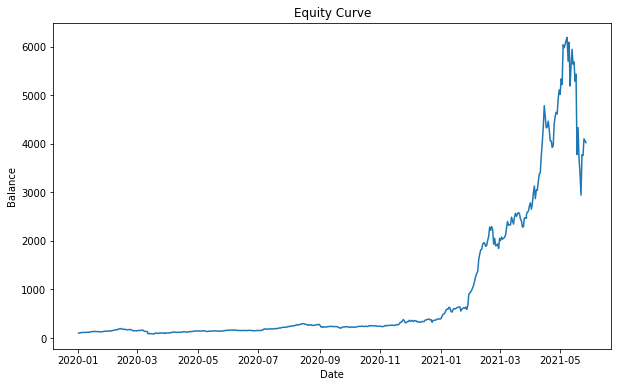

Yearly Return 218.03 %
Yearly Volatility 85.36 %
Monthly VaR 39.56 %
Maximum Drawdown 58.12 %


In [8]:
y_return=metrics.portfolio_return(eq_weights) #yearly return from metrics library
volatility=metrics.portfolio_stdev(eq_weights) #volatility from metrics library
monthly_VaR=min(metrics.portfolio_VaR(eq_weights,confidence,monthly_days),1) #monthly VaR from metrics library, limit at 100%
max_drawdown=metrics.Max_Drawdown(eq_weights) #maximum drawdown from metrics library
metrics.Balance_Graph(eq_weights) #Performance Graph from metrics library

#Printing all informations
print("Yearly Return",np.around(y_return*100,2), "%")
print("Yearly Volatility",np.around(volatility*100,2), "%")
print("Monthly VaR",np.around(monthly_VaR*100,2), "%")
print("Maximum Drawdown",np.around(max_drawdown*100,2), "%")

## Risk Contributed Portfolio

### Obtaining weights in array format

In [9]:
rc_weights_df=portfolio.Risk_Contributed_Optimized_Weights()
rc_weights=rc_weights_df['weights'].to_numpy() 
print(rc_weights_df)

      ticker  weights
0    BTC-USD   0.1663
1    ETH-USD   0.1195
2   LINK-USD   0.1006
3    ADA-USD   0.1108
4    BNB-USD   0.1120
5   DOGE-USD   0.0752
6    XRP-USD   0.1089
7    BCH-USD   0.1000
8  LUNA1-USD   0.1066


### Calculating Required Metrics

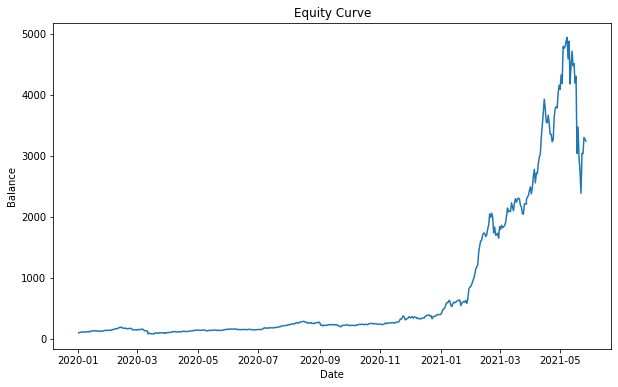

Yearly Return 204.62 %
Yearly Volatility 81.77 %
Monthly VaR 37.89 %
Maximum Drawdown 58.06 %


In [10]:
y_return=metrics.portfolio_return(rc_weights)
volatility=metrics.portfolio_stdev(rc_weights)
monthly_VaR=min(metrics.portfolio_VaR(rc_weights,confidence,monthly_days),1)
max_drawdown=metrics.Max_Drawdown(rc_weights)
metrics.Balance_Graph(rc_weights)

#Printing all informations
print("Yearly Return",np.around(y_return*100,2), "%")
print("Yearly Volatility",np.around(volatility*100,2), "%")
print("Monthly VaR",np.around(monthly_VaR*100,2), "%")
print("Maximum Drawdown",np.around(max_drawdown*100,2), "%")

# Mean Variance Optimized Portfolio

### Obtaining weights in array format

In [11]:
mv_weights_df=portfolio.meanVariance_Optimized_Weights()
mv_weights=mv_weights_df['weights'].to_numpy()
print(mv_weights_df)

      ticker  weights
0    BTC-USD   0.0000
1    ETH-USD   0.0482
2   LINK-USD   0.0000
3    ADA-USD   0.3940
4    BNB-USD   0.2020
5   DOGE-USD   0.1533
6    XRP-USD   0.0000
7    BCH-USD   0.0000
8  LUNA1-USD   0.2025


### Calculating Required Metrics

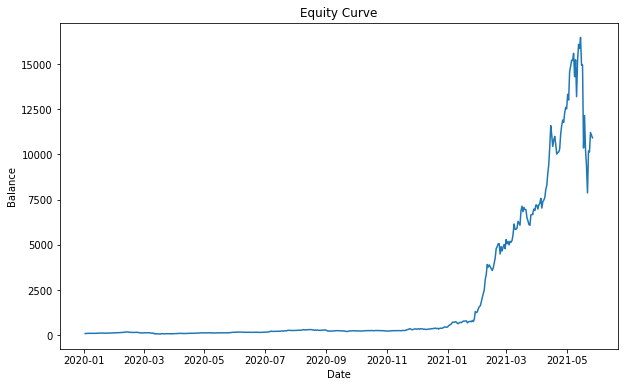

Yearly Return 273.98 %
Yearly Volatility 93.97 %
Monthly VaR 43.55 %
Maximum Drawdown 59.66 %


In [12]:
#obtaining metrics
y_return=metrics.portfolio_return(mv_weights)
volatility=metrics.portfolio_stdev(mv_weights)
monthly_VaR=min(metrics.portfolio_VaR(mv_weights,confidence,monthly_days),1)
max_drawdown=metrics.Max_Drawdown(mv_weights)
metrics.Balance_Graph(mv_weights)

#Printing all informations
print("Yearly Return",np.around(y_return*100,2), "%")
print("Yearly Volatility",np.around(volatility*100,2), "%")
print("Monthly VaR",np.around(monthly_VaR*100,2), "%")
print("Maximum Drawdown",np.around(max_drawdown*100,2), "%")

## Summarizing Outputs

### Portfolio Allocation Output

In [13]:
a_data={"Ticker":list(price_df.columns),
      "Equal_Weighted":eq_weights,
      "Risk_Contributed":rc_weights,
      "Mean_Variance":mv_weights}
a_df=pd.DataFrame(a_data) #creating DataFrame from dictionary
print(a_df)

      Ticker  Equal_Weighted  Risk_Contributed  Mean_Variance
0    BTC-USD        0.111111            0.1663         0.0000
1    ETH-USD        0.111111            0.1195         0.0482
2   LINK-USD        0.111111            0.1006         0.0000
3    ADA-USD        0.111111            0.1108         0.3940
4    BNB-USD        0.111111            0.1120         0.2020
5   DOGE-USD        0.111111            0.0752         0.1533
6    XRP-USD        0.111111            0.1089         0.0000
7    BCH-USD        0.111111            0.1000         0.0000
8  LUNA1-USD        0.111111            0.1066         0.2025


### Metrics Output

In [14]:
"""making summarizing portfolio metrics output"""
weights_list=[eq_weights,rc_weights,mv_weights]
columns=['Equal_Weighted','Risk_Contributed','Mean_Variance']
metric={"Yearly_Return":[],"Volatility":[],"Monthly_VaR":[],"Max_Drawdown":[]}

#filling each arrays in metric dictionary
for x in weights_list:
    metric['Yearly_Return'].append(round(metrics.portfolio_return(x),4)*100)
    metric['Volatility'].append(round(metrics.portfolio_stdev(x),4)*100)
    metric['Monthly_VaR'].append(round(metrics.portfolio_VaR(x,confidence,monthly_days),4)*100)
    metric['Max_Drawdown'].append(round(metrics.Max_Drawdown(x),4)*100)
        
m_df=pd.DataFrame(metric.values(),columns=columns) #creating DataFrame
metric_names=pd.Series(list(metric.keys()))
m_df=pd.concat([metric_names.rename('Metrics in %'),m_df],axis=1) #Adding metrics as first column
print(m_df)

    Metrics in %  Equal_Weighted  Risk_Contributed  Mean_Variance
0  Yearly_Return          218.03            204.62         273.98
1     Volatility           85.36             81.77          93.97
2    Monthly_VaR           39.56             37.89          43.55
3   Max_Drawdown           58.12             58.06          59.66


### Performance Plot

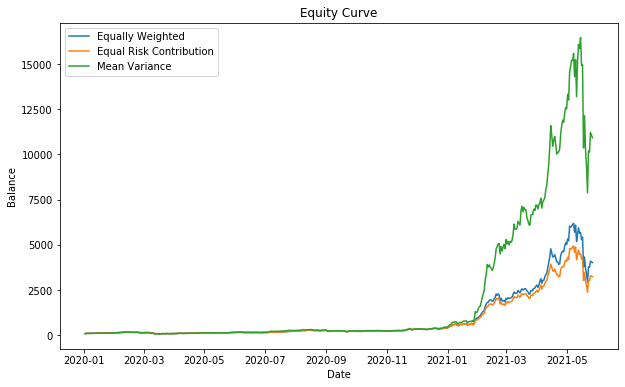

In [15]:
metrics.All_Balance_Graph(eq_weights,rc_weights,mv_weights)